# Cleaning US Census Data

You just got hired as a Data Analyst at the Census Bureau, which collects census data and creates interesting visualizations and insights from it.

The person who had your job before you left you all the data they had for the most recent census. It is in multiple `csv` files. They didn't use pandas, they would just look through these `csv` files manually whenever they wanted to find something. Sometimes they would copy and paste certain numbers into Excel to make charts.

The thought of it makes you shiver. This is not scalable or repeatable.

Your boss wants you to make some scatterplots and histograms by the end of the day. Can you get this data into `pandas` and into reasonable shape so that you can make these histograms?

## Inspect the Data!

1. The first visualization your boss wants you to make is a scatterplot that shows average income in a state vs proportion of women in that state.

   Open some of the census `csv` files that came with the kit you downloaded. How are they named? What kind of information do they hold? Will they help us make this graph?

In [2]:
# Yes but the info is mixed with male population in the same column

2. It will be easier to inspect this data once we have it in a DataFrame. You can't even call `.head()` on these `csv`s! How are you supposed to read them?

   Using `glob`, loop through the census files available and load them into DataFrames. Then, concatenate all of those DataFrames together into one DataFrame, called something like `us_census`.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob

files = glob.glob("states*.csv")

df_list = []

for filename in files:
    data = pd.read_csv(filename, index_col= 0)
    df_list.append(data)

us_census = pd.concat(df_list, ignore_index= True)

us_census.head()

,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop
0,Alabama,4830620,3.75%,61.88%,31.25%,0.45%,1.05%,0.03%,"$43,296.36",2341093M_2489527F
1,Alaska,733375,5.91%,60.91%,2.85%,16.39%,5.45%,1.06%,"$70,354.74",384160M_349215F
2,Arizona,6641928,29.57%,57.12%,3.85%,4.36%,2.88%,0.17%,"$54,207.82",3299088M_3342840F
3,Arkansas,2958208,6.22%,71.14%,18.97%,0.52%,1.14%,0.15%,"$41,935.63",1451913M_1506295F
4,California,38421464,37.29%,40.22%,5.68%,0.41%,13.05%,0.35%,"$67,264.78",19087135M_19334329F


3. Look at the `.columns` and the `.dtypes` of the `us_census` DataFrame. Are those datatypes going to hinder you as you try to make histograms?

In [4]:
print(us_census.columns)
print(us_census.dtypes)
# We need to reshape this table to make it "histogramable". This include converting the datatypes.

Index(['State', 'TotalPop', 'Hispanic', 'White', 'Black', 'Native', 'Asian',
       'Pacific', 'Income', 'GenderPop'],
      dtype='object')
State        object
TotalPop      int64
Hispanic     object
White        object
Black        object
Native       object
Asian        object
Pacific      object
Income       object
GenderPop    object
dtype: object


4. Look at the `head()` of the DataFrame so that you can understand why some of these `dtypes` are objects instead of integers or floats.

   Start to make a plan for how to convert these columns into the right types for manipulation.

In [5]:
# We´ll need to convert cols [3:9] to floats. Also col [10] we´ll need some column parsing.

## Regex to the Rescue

5. Use regex to turn the `Income` column into a format that is ready for conversion into a numerical type.

In [6]:
us_census["Income"] = us_census["Income"].replace("[\$,]", "", regex=True)
us_census["Income"] = pd.to_numeric(us_census["Income"])
us_census["Income"].head()

0    43296.36
1    70354.74
2    54207.82
3    41935.63
4    67264.78
Name: Income, dtype: float64

6. Look at the `GenderPop` column. We are going to want to separate this into two columns, the `Men` column, and the `Women` column.

   Split the column into those two new columns using `str.split` and separating out those results.

In [7]:
split_df = us_census["GenderPop"].str.split("(\d+)", expand= True)
# split_df.head()

us_census["Men"] = pd.to_numeric(split_df[1])
us_census["Women"] = pd.to_numeric(split_df[3])

us_census["Women"].head()
# us_census.dtypes

0     2489527.0
1      349215.0
2     3342840.0
3     1506295.0
4    19334329.0
Name: Women, dtype: float64

7. Now you should have the columns you need to make the graph and make sure your boss does not slam a ruler angrily on your desk because you've wasted your whole day cleaning your data with no results to show!

   Use matplotlib to make a scatterplot!
   

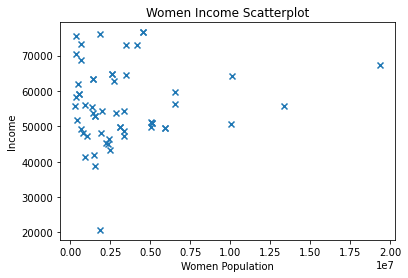

In [8]:
plt.scatter(us_census["Women"], us_census["Income"], marker= "x")
plt.title("Women Income Scatterplot")
plt.xlabel("Women Population")
plt.ylabel("Income")
plt.show()

8. You want to double check your work. You know from experience that these monstrous csv files probably have `nan` values in them! Print out your column with the number of women per state to see.

   We can fill in those `nan`s by using pandas' `.fillna()` function.
   
   You have the `TotalPop` per state, and you have the `Men` per state. As an estimate for the `nan` values in the `Women` column, you could use the `TotalPop` of that state minus the `Men` for that state.
   
   Print out the `Women` column after filling the `nan` values to see if it worked!

In [9]:
us_census["Women"] = us_census["Women"].fillna(us_census["TotalPop"] - us_census["Men"])
# us_census[["TotalPop", "Men", "Women"]]


9. We forgot to check for duplicates!

In [10]:
us_census = us_census.drop_duplicates(ignore_index=True)
# us_census.duplicated()


10. Make the scatterplot again. Now, it should be perfect! Your job is secure, for now.

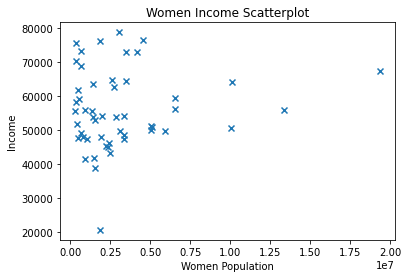

In [11]:
plt.scatter(us_census["Women"], us_census["Income"], marker= "x")
plt.title("Women Income Scatterplot")
plt.xlabel("Women Population")
plt.ylabel("Income")
plt.show()

## Histogram of Races

11. Now your boss wants you to make a bunch of histograms out of the race data that you have. Look at the `.columns` again to see what the race categories are.

In [12]:
# us_census.columns
us_census.dtypes

State         object
TotalPop       int64
Hispanic      object
White         object
Black         object
Native        object
Asian         object
Pacific       object
Income       float64
GenderPop     object
Men            int64
Women        float64
dtype: object

12. Try to make a histogram for each one!

    You will have to get the columns into the numerical format, and those percentage signs will have to go.
    
    Don't forget to fill the `nan` values with something that makes sense! You probably dropped the duplicate rows when making your last graph, but it couldn't hurt to check for duplicates again.

In [13]:
us_census[["Hispanic", "White", "Black", "Native", "Asian", "Pacific"]]= us_census[["Hispanic", "White", "Black", "Native", "Asian", "Pacific"]].replace("[\%,]", "", regex= True)
races = ["Hispanic", "White", "Black", "Native", "Asian", "Pacific"]

for race in races:
    us_census[race] = pd.to_numeric(us_census[race])
us_census.dtypes


State         object
TotalPop       int64
Hispanic     float64
White        float64
Black        float64
Native       float64
Asian        float64
Pacific      float64
Income       float64
GenderPop     object
Men            int64
Women        float64
dtype: object

Pacific


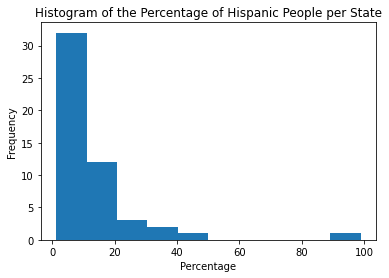

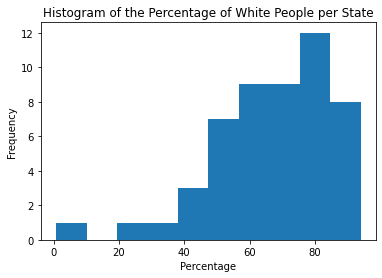

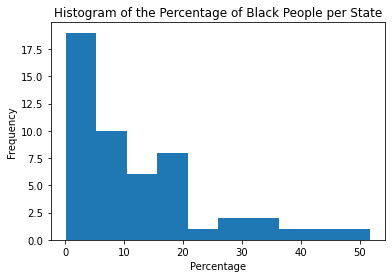

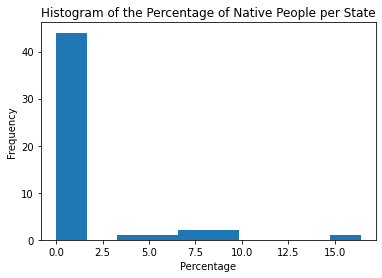

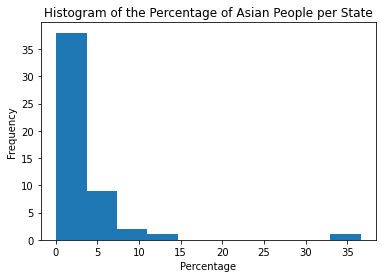

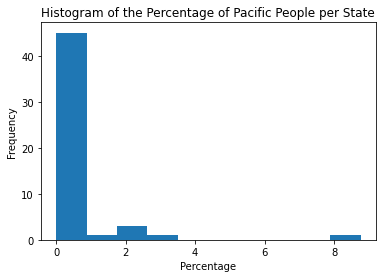

<Figure size 432x288 with 0 Axes>

In [14]:
for race in races:
    for row in us_census[race]:
        if np.isnan(row) == True:
            print(race)
            break
        else:
            continue
# print(us_census["Pacific"])

us_census["Pacific"] = us_census["Pacific"].fillna(100 - us_census["Hispanic"] - us_census["White"] - us_census["Black"] - us_census["Native"] - us_census["Asian"])

for race in races:
    for row in us_census[race]:
        if np.isnan(row) == True:
            print(race)
            break
        else:
            continue

# us_census["Pacific"]

for race in races:
    plt.hist(us_census[race])
    plt.title("Histogram of the Percentage of {} People per State".format(race))
    plt.xlabel("Percentage")
    plt.ylabel("Frequency")
    plt.show()
    plt.clf()


    


## Bar charts of Races
13. Now let´s try to make a bar chart for each State so we can apreciate the differences in their population.

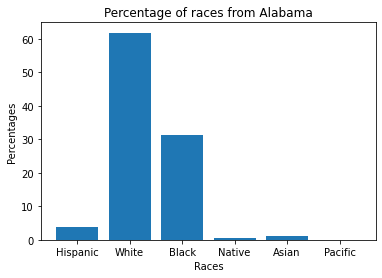

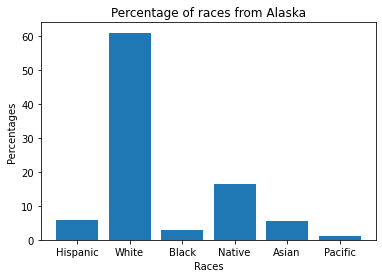

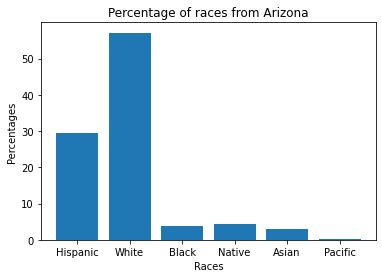

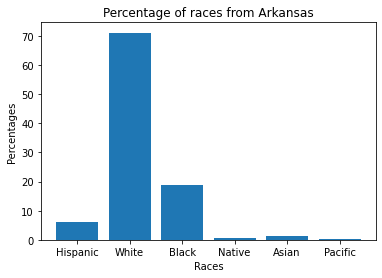

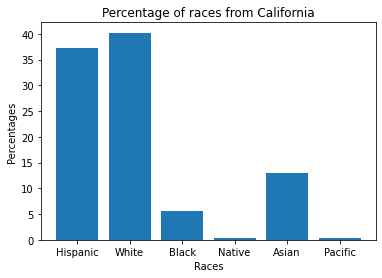

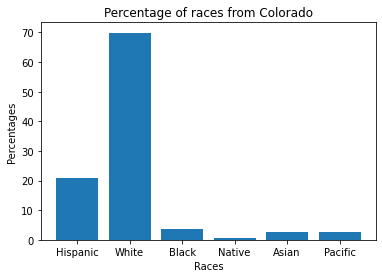

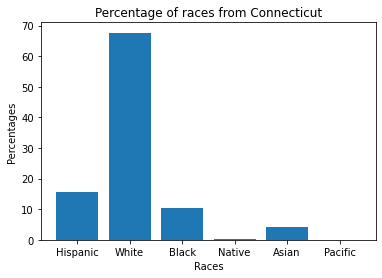

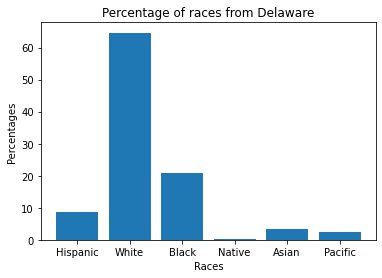

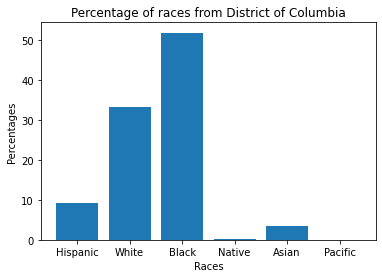

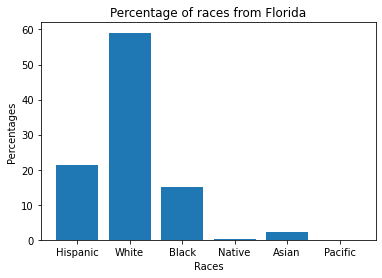

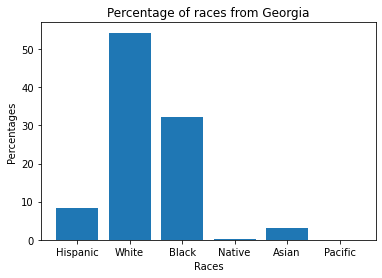

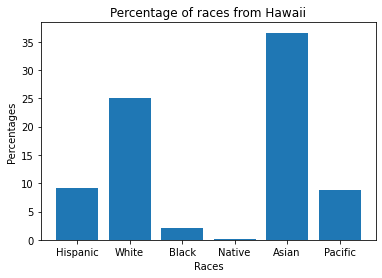

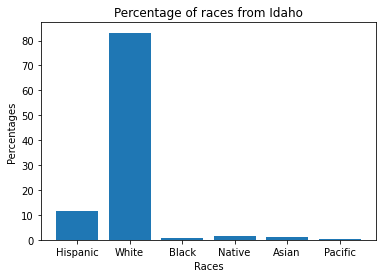

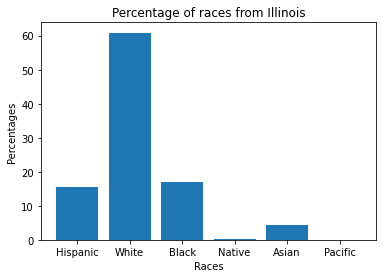

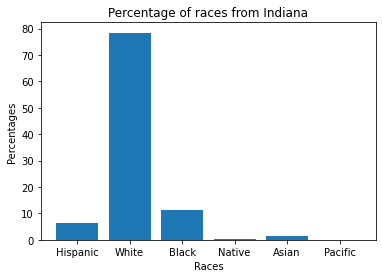

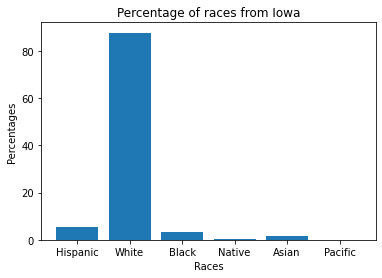

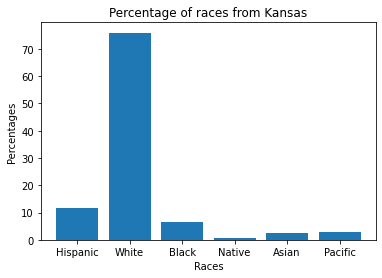

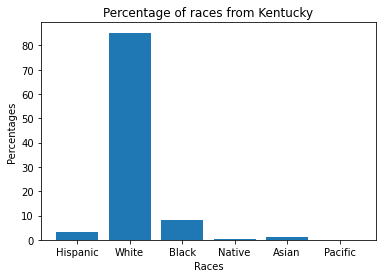

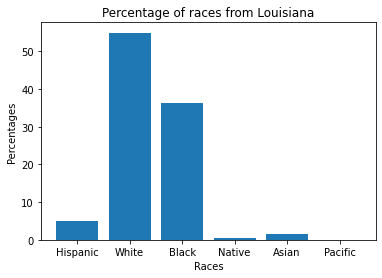

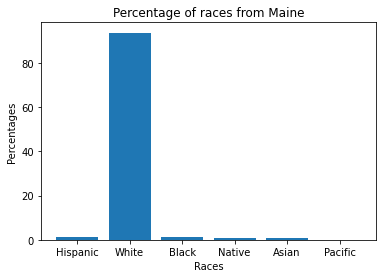

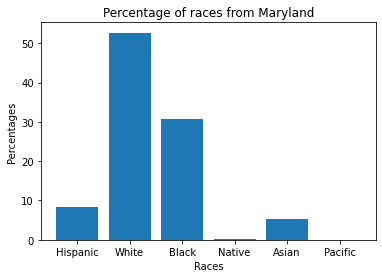

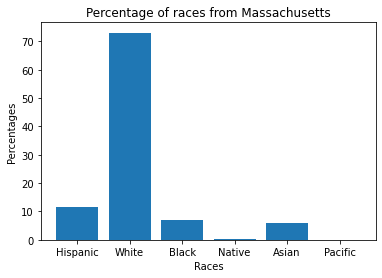

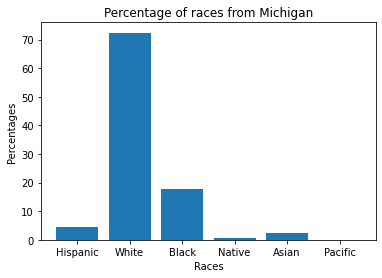

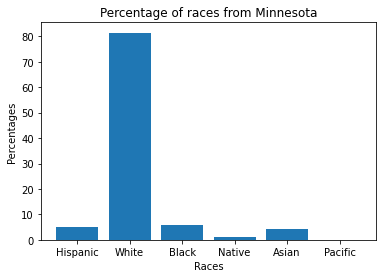

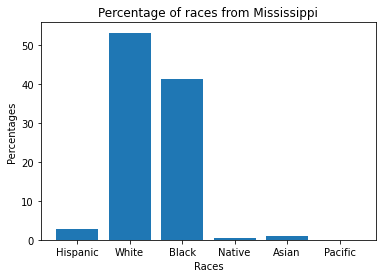

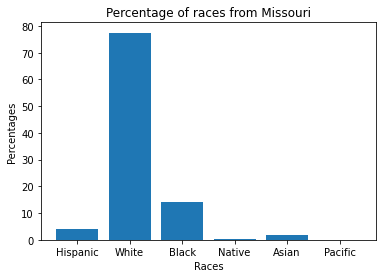

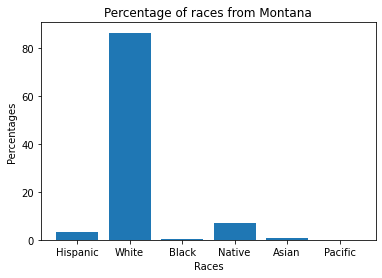

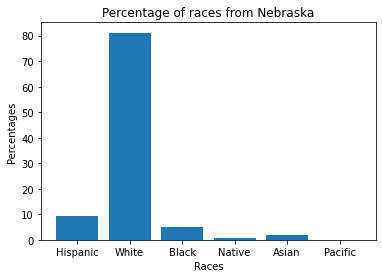

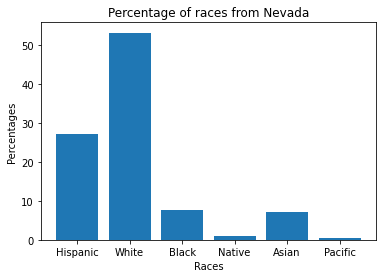

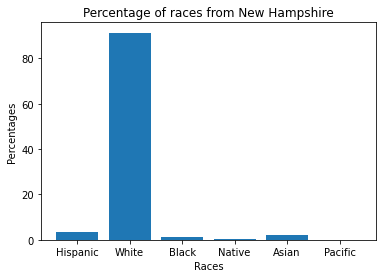

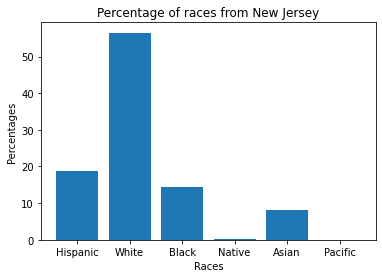

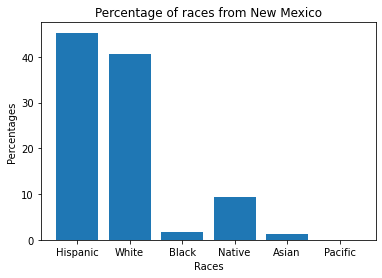

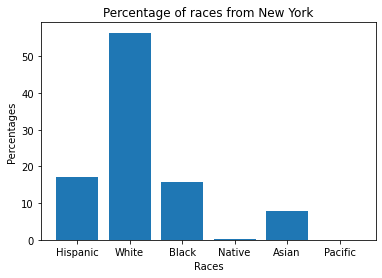

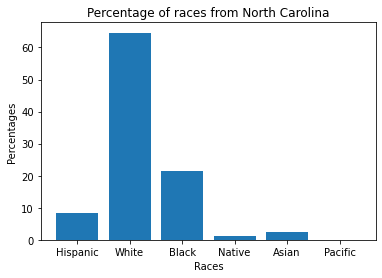

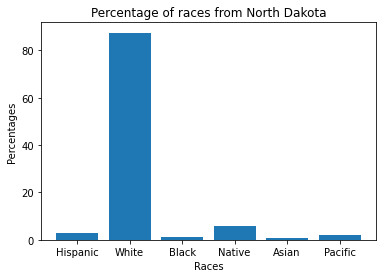

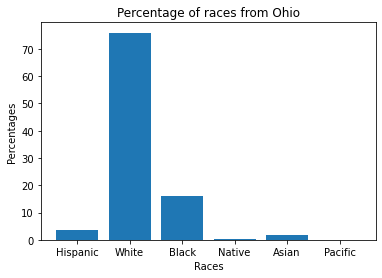

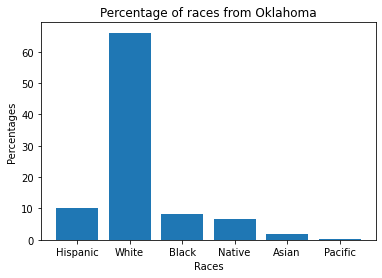

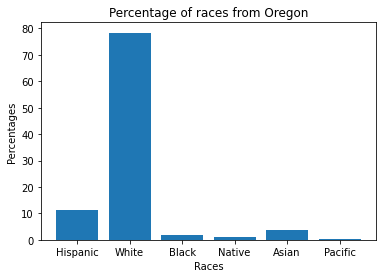

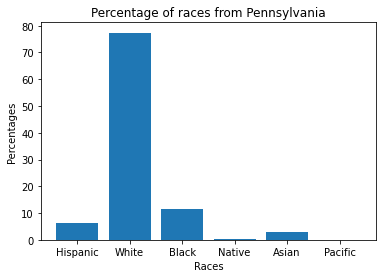

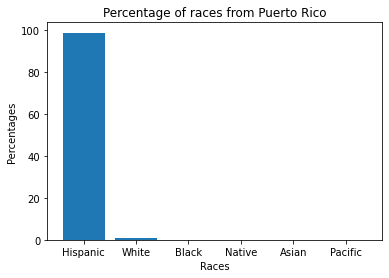

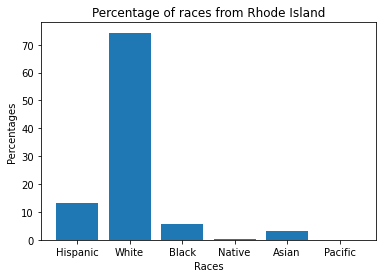

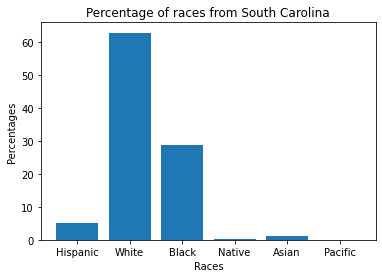

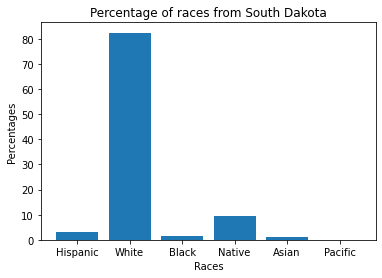

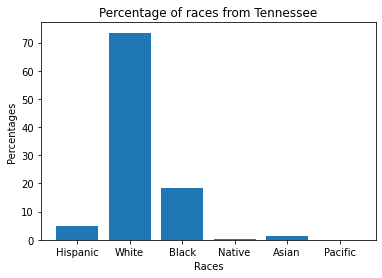

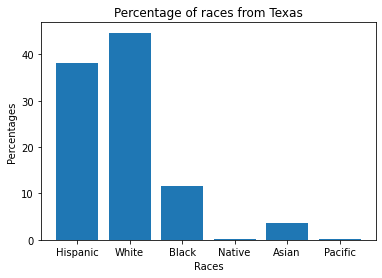

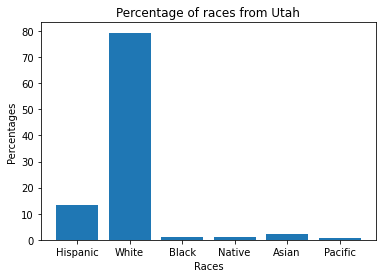

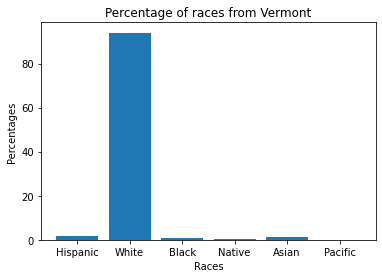

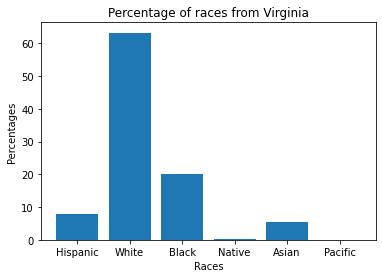

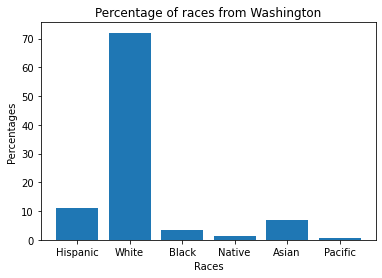

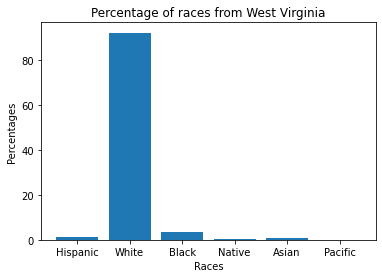

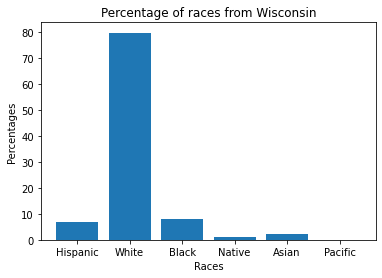

<Figure size 432x288 with 0 Axes>

In [25]:
us_census2 = pd.melt(frame= us_census, id_vars= ["State", "TotalPop", "Income"], value_vars= ["Hispanic", "White", "Black", "Native", "Asian", "Pacific"], value_name= "Percentage", var_name= "Races")

for state in us_census["State"]:
    state_df = us_census2[ us_census2["State"] == state]
    plt.bar(state_df["Races"], state_df["Percentage"])
    plt.title("Percentage of races from {}".format(state))
    plt.xlabel("Races")
    plt.ylabel("Percentages")
    plt.show()
    plt.clf()